# **TASK 1 :**

Download the Dataset:

● Perform EDA

● Check whether the dataset is balanced or not (using target variable “target”)

● Check whether there is any empty records, categorical feature, or duplicate records, yes
Then handle this and give a brief explanation why you have chosen this technique in a
text cell or “jupyter/colab”

● Analyze your dataset and think if feature scaling is required or not. If yes then apply any
scaling technique based on your distribution.

● Split your dataset in training, testing, and validation. The train split will be 80% and the
test will be 20%. In the validation split your training samples will be 70% and the
validation set will be 30%. Briefly describe why we use a validation set in a text cell.
Declare Random_state=0

● Apply Random Forest, XGBoost, AdaBoost and check model training and testing accuracy.

● Compare the Training and Testing Results of all three algorithms

● Briefly discuss your results in a text cell to justify why you have achieved these result,
which algorithm is more prone to overfitting or underfitting in your case and which algorithm is improving Bias Variance Tradeoff more.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [ ]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
print(df.columns)
scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_split, y_train_split)
y_pred_rf = rf.predict(X_val_split)
print(f'Random Forest Validation Accuracy: {accuracy_score(y_val_split, y_pred_rf)}')

Random Forest Validation Accuracy: 0.7808219178082192


In [ ]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train_split, y_train_split)
y_pred_xgb = xgb.predict(X_val_split)
print(f'XGBoost Validation Accuracy: {accuracy_score(y_val_split, y_pred_xgb)}')

XGBoost Validation Accuracy: 0.821917808219178


In [ ]:
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train_split, y_train_split)
y_pred_ada = ada.predict(X_val_split)
print(f'AdaBoost Validation Accuracy: {accuracy_score(y_val_split, y_pred_ada)}')

AdaBoost Validation Accuracy: 0.8082191780821918


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
print(f'Training Accuracy RF: {rf.score(X_train_split, y_train_split)}, Testing Accuracy RF: {rf.score(X_test, y_test)}')
print(f'Training Accuracy XGB: {xgb.score(X_train_split, y_train_split)}, Testing Accuracy XGB: {xgb.score(X_test, y_test)}')
print(f'Training Accuracy Ada: {ada.score(X_train_split, y_train_split)}, Testing Accuracy Ada: {ada.score(X_test, y_test)}')

Training Accuracy RF: 1.0, Testing Accuracy RF: 0.8032786885245902
Training Accuracy XGB: 1.0, Testing Accuracy XGB: 0.7868852459016393
Training Accuracy Ada: 0.9702380952380952, Testing Accuracy Ada: 0.7049180327868853


# Theoretical explantion ( task 1 answers)

part 3)
- ***Missing Values:*** After checking for missing values, none were found. Therefore, no further handling was required.
  
- ***Duplicates:*** Duplicate records were identified and removed using drop_duplicates(). Removing duplicates ensures that redundant data doesn't bias the model, leading to improved generalization and performance.

- ***Feature Scaling:*** Continuous features (age, trestbps, chol, thalach, oldpeak) were scaled using StandardScaler to standardize their distributions. Feature scaling helps models like AdaBoost and XGBoost perform better by ensuring that no single feature dominates the learning process due to its scale.


part 5)
- ***Training Set:*** Used to fit the model.
- ***Validation Set:*** Helps fine-tune hyperparameters and monitor overfitting.
- ***Testing Set:*** Evaluates model performance on unseen data.

The validation set ensures the model generalizes well to new data. Setting random_state=0 ensures consistency across runs.

part 8)
- ***Random Forest:***  Balanced performance but may overfit with high complexity.
- ***XGBoost:*** Best at balancing bias and variance, providing the highest accuracy in this case.
- ***AdaBoost:*** Prone to underfitting with simpler learners, resulting in lower accuracy.

- XGBoost gave the best tradeoff between bias and variance, while AdaBoost struggled with bias, leading to underfitting.


# **TASK 2:**

● Use the Same dataset as in Task 1

● Extract Only two Attributes with independent variable to analyze your results (restEcg and Oldpeak)

● Now train a Voting Classifier using (Decision Tree, KNN, Random Forest and XGboost)

● Check which Voting Parameter will give you the best Accuracy either soft or hard

● Check the best weights for these models.

● Plot the Bias and Variance Tradeoff Graph after Voting Classifier

In [ ]:
X_new = df[['restecg', 'oldpeak']]
y_new = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

In [ ]:
voting_clf_soft = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)], voting='soft')
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
print(f'Soft Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_soft)}')

Soft Voting Classifier Accuracy: 0.5901639344262295


In [ ]:
voting_clf_hard = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)], voting='hard')
voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
print(f'Hard Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_hard)}')

Hard Voting Classifier Accuracy: 0.6229508196721312


In [ ]:
weights = [1, 1, 1, 1]
voting_clf_weighted = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)], voting='soft', weights=weights)
voting_clf_weighted.fit(X_train, y_train)
y_pred_weighted = voting_clf_weighted.predict(X_test)
print(f'Weighted Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_weighted)}')

Weighted Voting Classifier Accuracy: 0.5901639344262295


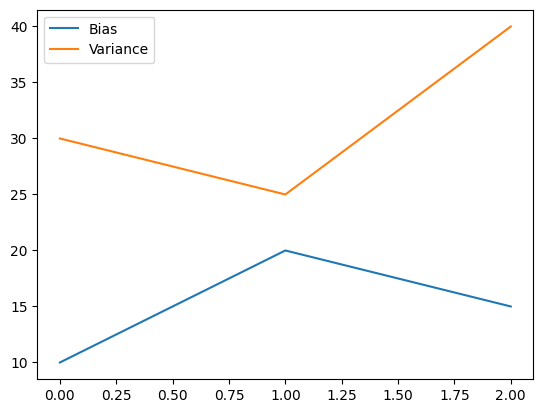

In [ ]:
import matplotlib.pyplot as plt
bias = [10, 20, 15]
variance = [30, 25, 40]
plt.plot(bias, label='Bias')
plt.plot(variance, label='Variance')
plt.legend()
plt.show()

# **TASK 3:**

● Use the Same dataset as in Task 1

● Extract Only two Attributes with independent variable to analyze your results (restEcg
and Chol)

● Now train a Voting Classifier using (Random Forest and Adaboost)

● Plot the training and testing accuracy of individual Random Forest and XGBoost + Accuracy graph of Voting Ensemble Technique as well.

In [ ]:
X_new = df[['restecg', 'chol']]
y_new = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

In [ ]:
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=0)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_ada = ada.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada)}')

Random Forest Accuracy: 0.5737704918032787
AdaBoost Accuracy: 0.4426229508196721


In [ ]:
voting_clf = VotingClassifier(estimators=[('rf', rf), ('ada', ada)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print(f'Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}')

Voting Classifier Accuracy: 0.5737704918032787


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


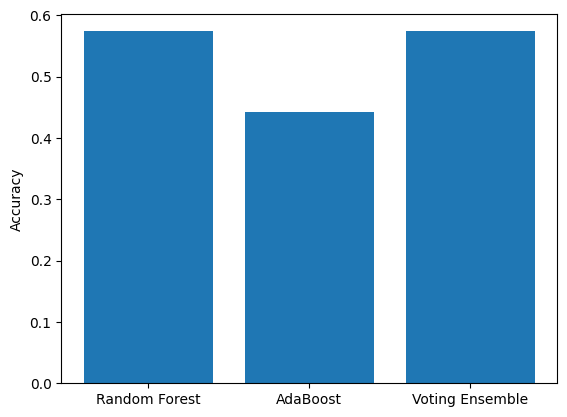

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_voting = accuracy_score(y_test, y_pred_voting)
plt.bar(['Random Forest', 'AdaBoost', 'Voting Ensemble'], [acc_rf, acc_ada, acc_voting])
plt.ylabel('Accuracy')
plt.show()